In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import librosa
import json 

In [ ]:
dataset_path = r"/content/drive/MyDrive/pemsu/Dataset"
json_path = r"/content/drive/MyDrive/pemsu/Hasil_Ekstraksi_Fitur.json"

SAMPLES = 22050

In [ ]:
 def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512):

    # Pembuatan variabel data sebagai dictionary
    data = {
        "directory": [],
        "filename": [],
        "labels": [],
        "mfcc": [],
    }

    # Melakukan looping pada setiap folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        label = dirpath.split("/")[-1]
        print("Memproses Folder :", label)
        data["directory"].append(label)

        # Melakukan looping pada setiap file dalam folder
        for f in filenames: 
            file_path = os.path.join(dirpath, f)
            signal,sr = librosa.load(file_path, duration=10)
            data["filename"].append(f)

            # Melakukan pembaruan durasi audio menjadi 10 detik
            total_sample = sr * 10
            if len(signal) < total_sample:
                signal = librosa.util.fix_length(signal, size=total_sample, mode='wrap')

            # Melakukan proses ekstraksi fitur
            mfcc = librosa.feature.mfcc(y = signal, sr = sr, n_fft = n_fft, n_mfcc = n_mfcc, hop_length = hop_length)

            # Menyimpan label dan hasil mfcc kedalam dictionary data 
            data["labels"].append(i-1)
            data["mfcc"].append(mfcc.T.tolist())

    # Membuat file .json dan menyimpan dictionary data kedalamnya
    with open(json_path,"w") as f:
        json.dump(data,f,indent=4)

In [ ]:
save_mfcc(dataset_path,json_path)

Memproses Folder : Dataset
Memproses Folder : Horn
Memproses Folder : Sirene


In [ ]:
import matplotlib.pyplot as plt
import librosa.display

audio_file = "/content/drive/MyDrive/pemsu/Dataset/Sirene/sound_1.wav"
audio_file2 = "/content/drive/MyDrive/pemsu/Dataset/Horn/1.wav"

FIG_SIZE = (15,10);

File : /content/drive/MyDrive/pemsu/Dataset/Sirene/sound_1.wav


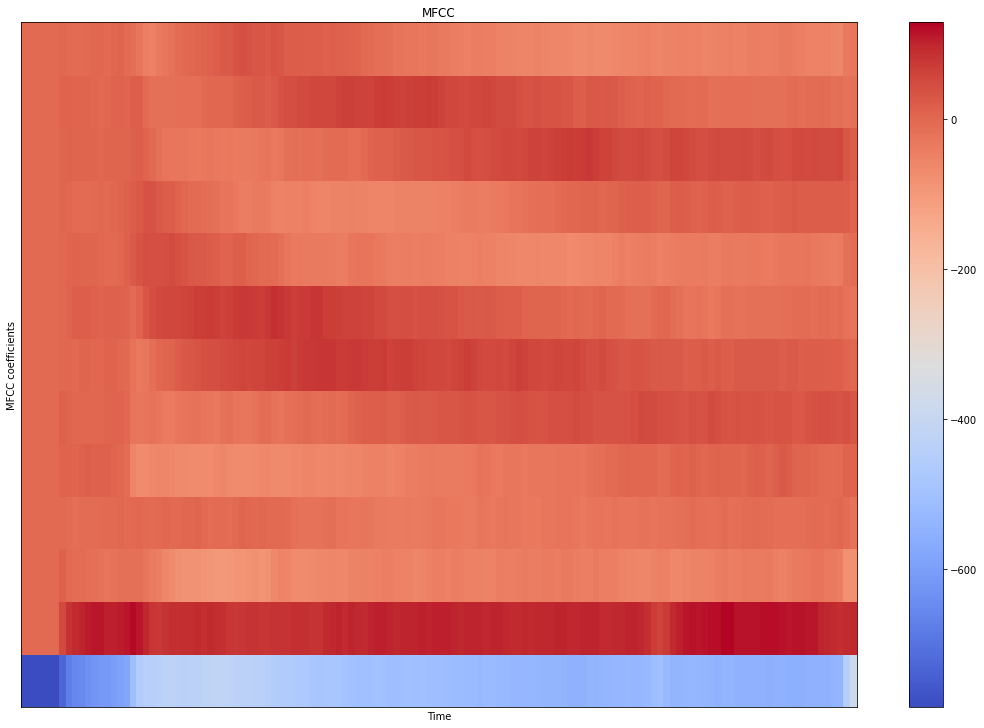


File : /content/drive/MyDrive/pemsu/Dataset/Horn/1.wav


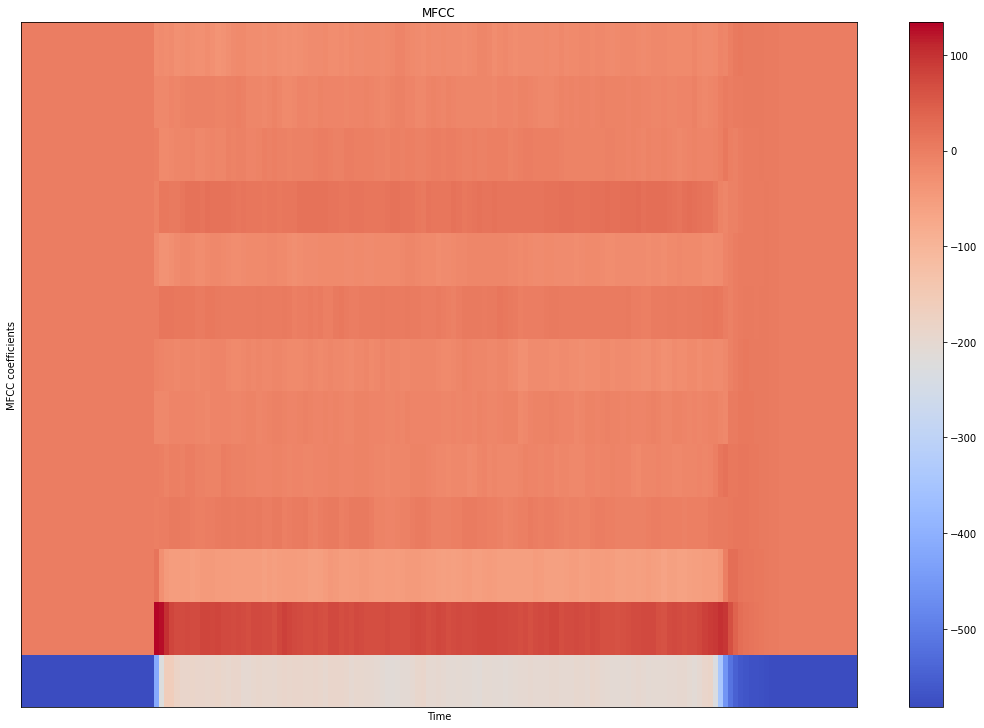

In [ ]:
def display_mfcc(audio_file):
  signal, sr = librosa.load(audio_file, sr=22050)

  MFCCs = librosa.feature.mfcc(signal, sr, n_fft=2048, hop_length=512, n_mfcc=13)

  plt.figure(figsize=FIG_SIZE)
  librosa.display.specshow(MFCCs, sr=sr, hop_length=512)
  print("File :", audio_file)
  plt.xlabel("Time")
  plt.ylabel("MFCC coefficients")
  plt.colorbar()
  plt.tight_layout()
  plt.title("MFCC")
  plt.show()
  print()

display_mfcc(audio_file)
display_mfcc(audio_file2)

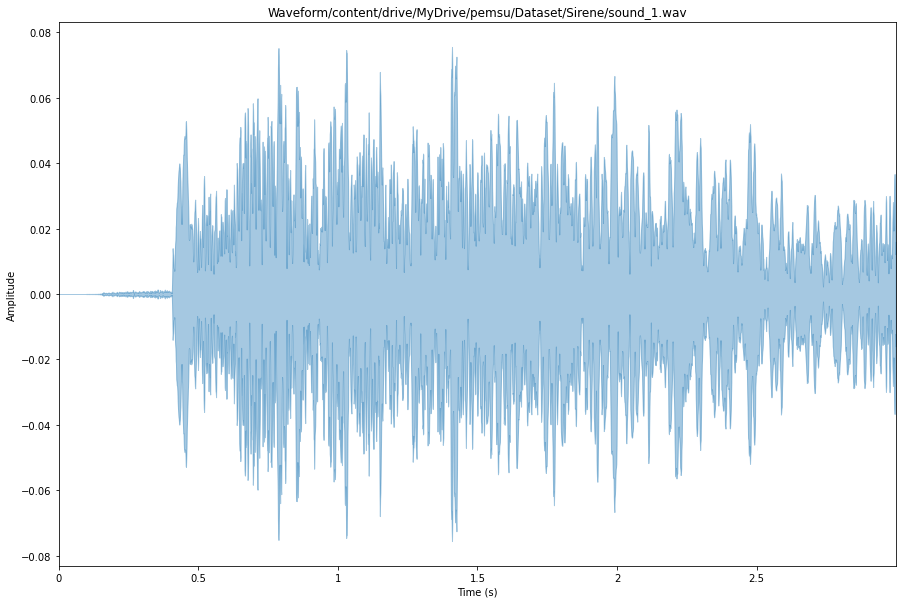

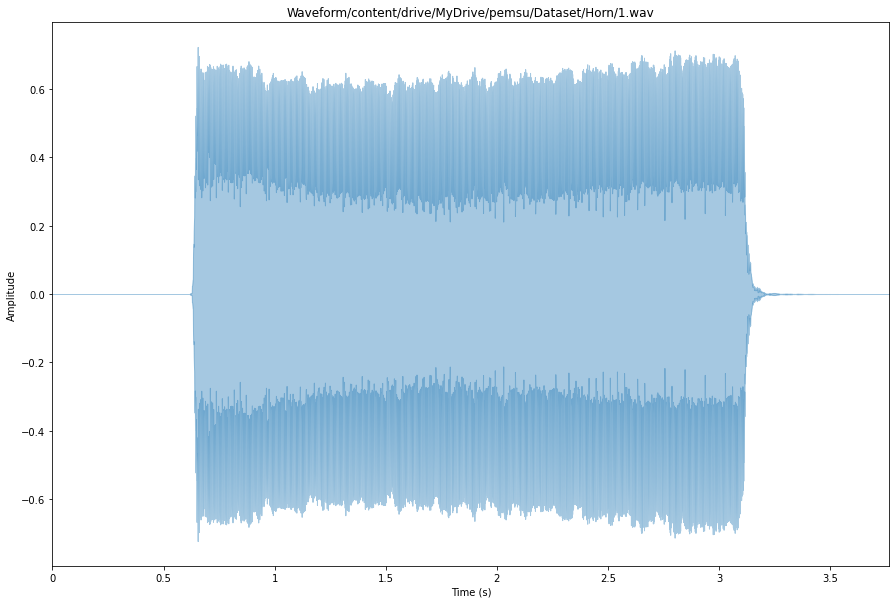

In [ ]:
def display_waveform(audio_file):
  
  signal, sr = librosa.load(audio_file, sr=22050)

  plt.figure(figsize=FIG_SIZE)
  librosa.display.waveplot(signal, sr=sr, alpha=0.4)
  plt.xlabel("Time (s)")
  plt.ylabel("Amplitude")
  plt.title("Waveform" + str(audio_file))
  plt.show()
  print()

display_waveform(audio_file)
display_waveform(audio_file2)